#### Thuat toan 
1. Khoi tao k center
2. Phan moi diem vao cluster co center gan no nhat.
3. Tinh Cost function : khong thay doi hoac thay doi nho thi dung.
4. Cap nhat lai center cho tung cluster bang cach lay trung binh cong.
5. Quay lai b2.

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

In [20]:

def find_closest_centroids(X, centroids) : 
    K = centroids.shape[0] 
    idx = np.zeros(X.shape[0]) 
    for i in range(X.shape[0]) : 
        distance = []
        for j in range(K) : 
            norm = np.linalg.norm(X[i] - centroids[j])  #norm 
            distance.append(norm) 
        
        idx[i] = np.argmin(distance) #  idx of centroids that X[i] belongs to 
    
    return idx


def compute_centroids(X, idx, K) : 
    centroids = np.zeros((K, X.shape[1])) 
    for k in range(K): 
        listpoints = X[idx == k] 
        centroids[k] = np.mean(listpoints, axis = 0)
    
    return centroids 

def compute_cost(X, idx, centroids) : 
    cost = 0 
    for i in range(X.shape[0]) : 
        cost += np.linalg.norm(X[i] - centroids[int(idx[i])])**2 
    
    return cost 
            

CLuster : 
 [[  77.21880545   59.82426423]
 [  -0.52661675 -102.08375266]
 [ -89.87742884   50.37560377]]


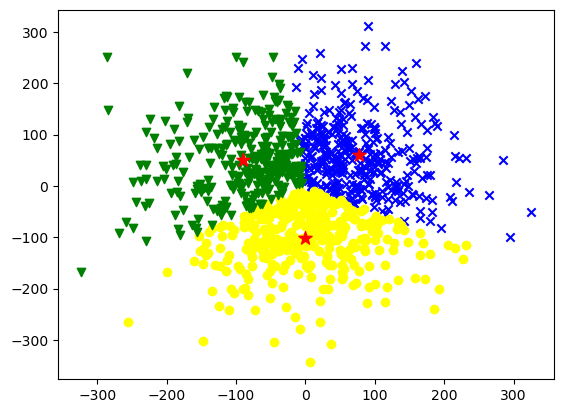

In [21]:
def Run_Kmeans(X, K, min) : 
    #init k 
    centroids = X[np.random.choice(X.shape[0], K, replace = False)]
    idx = find_closest_centroids(X, centroids)
    cost = compute_cost(X, idx, centroids) 
    
    while True : 
        centroids = compute_centroids(X, idx, K) 
        cost_new = compute_cost(X, idx, centroids) 
        if abs(cost - cost_new) < min  : 
            break  
        
        cost = cost_new 
        idx = find_closest_centroids(X, centroids) 
        

    return idx, centroids 
    
data = np.random.randn(1000, 2)* 100 
K = 3 
min = 0.01
idx, centroids = Run_Kmeans(data, K, min)
print("CLuster : \n", centroids) 
plt.scatter(data[idx == 0, 0], data[idx == 0, 1], color = "blue", marker = "x") 
plt.scatter(data[idx == 1, 0], data[idx == 1, 1], color = "yellow", marker = "o") 
plt.scatter(data[idx == 2, 0], data[idx == 2, 1], color = "green", marker= "v") 
plt.scatter(centroids[0][0], centroids[0][1], color = 'red', marker='*', s = 100)
plt.scatter(centroids[1][0], centroids[1][1], color = 'red', marker='*', s = 100)
plt.scatter(centroids[2][0], centroids[2][1], color = 'red', marker='*', s = 100)
plt.show()


CLuster : 
 [[  89.65139694   31.48535131]
 [ -29.88095575 -104.102751  ]
 [ -68.08065485   72.66776689]]


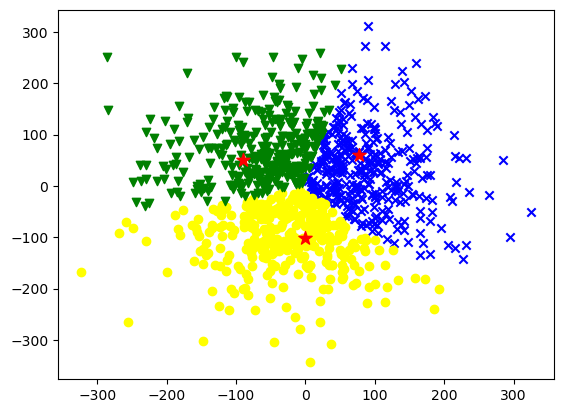

In [22]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3, random_state= 0).fit(data) 
print("CLuster : \n", kmeans.cluster_centers_) 
label = kmeans.predict(data) 
plt.scatter(data[label == 0, 0], data[label == 0, 1], color = "blue", marker = "x") 
plt.scatter(data[label == 1, 0], data[label == 1, 1], color = "yellow", marker = "o") 
plt.scatter(data[label == 2, 0], data[label == 2, 1], color = "green", marker= "v") 
plt.scatter(centroids[0][0], centroids[0][1], color = 'red', marker='*', s = 100)
plt.scatter(centroids[1][0], centroids[1][1], color = 'red', marker='*', s = 100)
plt.scatter(centroids[2][0], centroids[2][1], color = 'red', marker='*', s = 100)
plt.show()